In [147]:
"""
Created on: Tue. 9 Aug. 2022
Author: Mélina Verger
"""

import pandas as pd

# To make the train-test split
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# For cross-validation
from sklearn.model_selection import cross_val_score

# Metric
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

## Reduced data set

In [100]:
studentInfo_num_scaled = pd.read_csv("./data/studentInfo_num_scaled.csv")

In [101]:
studentInfo_num_scaled_reduced = studentInfo_num_scaled.loc[studentInfo_num_scaled["code_module_BBB"] == 1]

In [102]:
studentInfo_num_scaled_reduced.shape

(4784, 32)

In [103]:
studentInfo_num_scaled_reduced = studentInfo_num_scaled_reduced[["gender", "highest_education", "imd_band", "age_band", "num_of_prev_attempts",
"studied_credits", "disability", "final_result"]]

In [104]:
studentInfo_num_scaled_reduced.shape

(4784, 8)

In [105]:
studentInfo_num_scaled_reduced

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
558,0.0,0.25,1.0,0.0,0.333333,0.050,0.0,0.0
559,0.0,0.25,1.0,0.0,0.000000,0.150,0.0,1.0
560,1.0,0.25,0.0,0.0,0.000000,0.150,0.0,0.0
561,1.0,0.50,1.0,0.5,0.000000,0.050,0.0,1.0
562,0.0,0.50,1.0,0.5,0.333333,0.150,0.0,1.0
...,...,...,...,...,...,...,...,...
5337,0.0,0.25,0.0,0.5,0.000000,0.150,0.0,1.0
5338,0.0,0.75,1.0,0.5,0.000000,0.050,0.0,1.0
5339,0.0,0.75,0.0,0.5,0.000000,0.075,0.0,1.0
5340,0.0,0.25,0.0,0.5,0.000000,0.150,1.0,1.0


## Machine learning

### X-y split

In [106]:
X = studentInfo_num_scaled_reduced.drop(columns="final_result")
y = studentInfo_num_scaled_reduced["final_result"]

### Train-test split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y, shuffle=True)

In [108]:
print(X_train.shape)
print(X_test.shape)

(3348, 7)
(1436, 7)


### Out-of-the-box classifiers

#### Logistic regression

In [109]:
clf_lr = LogisticRegression(random_state=0)
clf_svc = LinearSVC(random_state=0)
clf_knearest = KNeighborsClassifier()
clf_dt = DecisionTreeClassifier(random_state=0)

In [120]:


clf_lr.fit(X_train, y_train)
print(clf_lr.score(X_train, y_train))
print(clf_lr.score(X_test, y_test))

scores_train = cross_val_score(clf_lr, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))

print(f"Accuracy on the test set: {accuracy_score(y_test, clf_lr.predict(X_test))}")


0.6490442054958184
0.6455431754874652
0.65 accuracy with a standard deviation of 0.01
Accuracy on the test set: 0.6455431754874652


##### LR - feature importance

In [124]:
clf_lr.coef_

array([[-0.1746405 ,  1.49466519, -0.5480163 ,  0.50259716, -2.25038511,
        -0.31650093, -0.0696534 ]])

In [137]:
pd.DataFrame(clf_lr.coef_, columns=X_train.columns, index=["coef"]).T

,coef
gender,-0.174640
highest_education,1.494665
imd_band,-0.548016
age_band,0.502597
num_of_prev_attempts,-2.250385
studied_credits,-0.316501
disability,-0.069653


In [143]:
pd.DataFrame(clf_lr.coef_, columns=X_train.columns, index=["coef"]).T.sort_values(by='coef', axis=0, ascending=False, key=abs)

,coef
num_of_prev_attempts,-2.250385
highest_education,1.494665
imd_band,-0.548016
age_band,0.502597
studied_credits,-0.316501
gender,-0.174640
disability,-0.069653


(-2.5, 2.0)

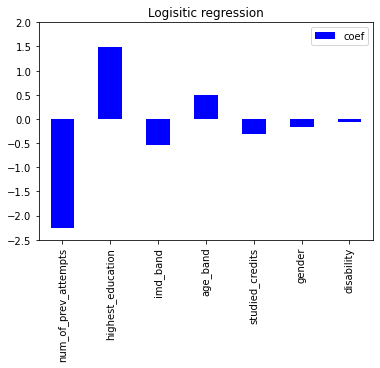

In [165]:
pd.DataFrame(clf_lr.coef_, columns=X_train.columns, index=["coef"]).T.sort_values(by='coef', axis=0, ascending=False, key=abs).plot.bar(color='b')
plt.title("Logisitic regression")
plt.ylim((-2.5,2))

#### SVC

In [121]:
clf_svc.fit(X_train, y_train)
print(clf_svc.score(X_train, y_train))
print(clf_svc.score(X_test, y_test))

scores_train = cross_val_score(clf_svc, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))

print(f"Accuracy on the test set: {accuracy_score(y_test, clf_svc.predict(X_test))}")

0.6502389486260454
0.6455431754874652
0.65 accuracy with a standard deviation of 0.00
Accuracy on the test set: 0.6455431754874652


##### SVC - Feature importance

(-2.5, 2.0)

<Figure size 432x288 with 0 Axes>

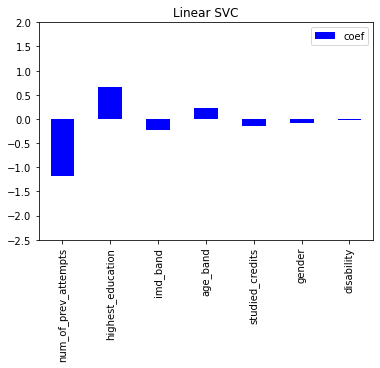

In [169]:
pd.DataFrame(clf_svc.coef_, columns=X_train.columns, index=["coef"]).T.sort_values(by='coef', axis=0, ascending=False, key=abs).plot.bar(color='b')
plt.title("Linear SVC")
plt.ylim((-2.5,2))

#### K-nearest neighbors

In [122]:

clf_knearest.fit(X_train, y_train)
print(clf_knearest.score(X_train, y_train))
print(clf_knearest.score(X_test, y_test))

scores_train = cross_val_score(clf_knearest, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))

print(f"Accuracy on the test set: {accuracy_score(y_test, clf_knearest.predict(X_test))}")

0.6006571087216248
0.5466573816155988
0.58 accuracy with a standard deviation of 0.02
Accuracy on the test set: 0.5466573816155988


/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/melinaverger/Desktop/exp2/env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

#### Decision tree

In [123]:
clf_dt.fit(X_train, y_train)
print(clf_dt.score(X_train, y_train))
print(clf_dt.score(X_test, y_test))

scores_train = cross_val_score(clf_dt, X_train, y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))

print(f"Accuracy on the test set: {accuracy_score(y_test, clf_dt.predict(X_test))}")

0.6920549581839904
0.6288300835654597
0.62 accuracy with a standard deviation of 0.01
Accuracy on the test set: 0.6288300835654597


##### DT - Feature importance

In [157]:
clf_dt.feature_importances_

array([0.11155794, 0.19677244, 0.11291912, 0.06245313, 0.18131049,
       0.29102671, 0.04396017])

In [162]:
pd.DataFrame(clf_dt.feature_importances_, index=X_train.columns, columns=["coef"])

,coef
gender,0.111558
highest_education,0.196772
imd_band,0.112919
age_band,0.062453
num_of_prev_attempts,0.181310
studied_credits,0.291027
disability,0.043960


(-2.5, 2.0)

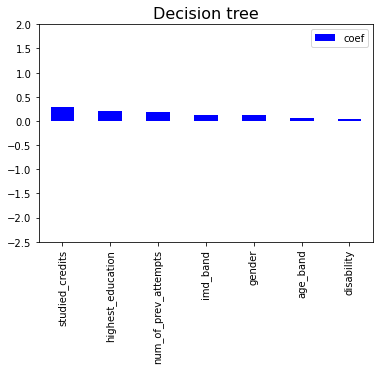

In [168]:
pd.DataFrame(clf_dt.feature_importances_, index=X_train.columns, columns=["coef"]).sort_values(by='coef', axis=0, ascending=False, key=abs).plot.bar(color='b')
plt.title("Decision tree")
plt.ylim((-2.5,2))